# 自明解の流量の数値計算

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
import json
from lib.ds2s_OV_x0 import ds2s_OV_x0
from lib.funcs import *

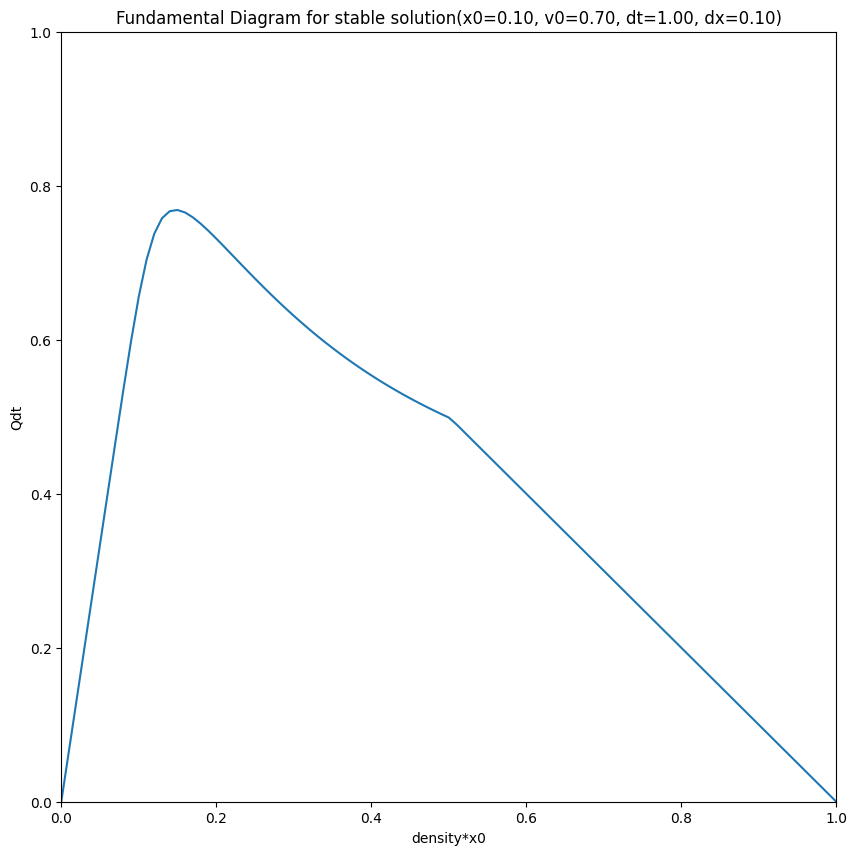

In [11]:
density = []
flow = []
for K in range(0, 101):
	density.append(0.1*K/10.0)
	flow.append(flow_stable(
		density=K/10.0,
		x_0=0.1,
		v_0=0.7,
		dt=1.0,
		dx=0.1
	))
plt.figure(figsize=(10, 10))
plt.xlim((0, 1.0))
plt.ylim((0, 1.0))
plt.xlabel("density*x0")
plt.ylabel("Qdt")
plt.title(
	"Fundamental Diagram for stable solution"
	+ "(x0={:.2f}, v0={:.2f}, dt={:.2f}, dx={:.2f})"
		.format(0.1, 0.7, 1.0, 0.1)
)
plt.plot(density, flow)
plt.show()

In [12]:
def fundamental_stable(
		x_0: np.float64,
		v_0: np.float64,
		dt: np.float64,
		dx: np.float64
	):
	rdx = []
	qt = []
	for d in [0.01 * i for i in range(0, 101)]:
		rdx.append(d)
		qt.append(flow_stable(density=d/x_0, x_0=x_0, v_0=v_0, dt=dt, dx=dx))
	return (rdx, qt)

In [13]:
x_0 = 0.1
v_0 = 0.7
dt = 1.0
dx = 0.1

## `dt`を変える

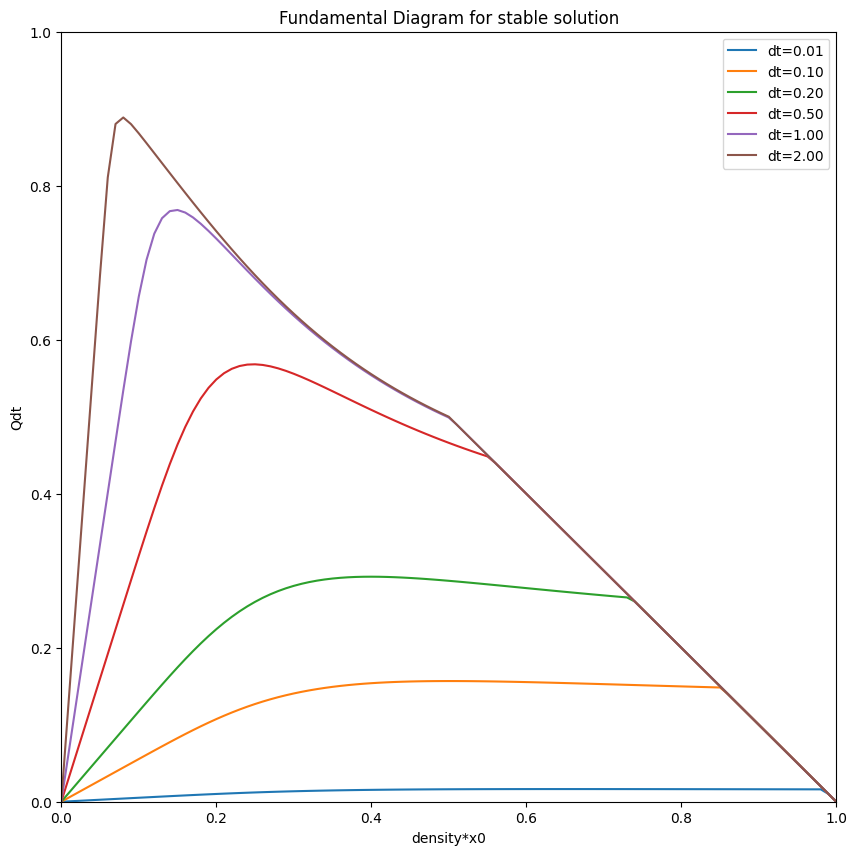

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim((0, 1.0))
ax.set_ylim((0, 1.0))
ax.set_xlabel("density*x0")
ax.set_ylabel("Qdt")
ax.set_title("Fundamental Diagram for stable solution")
for dt_ in [0.01, 0.1, 0.20, 0.5, 1.0, 2.0]:
	density, flow = fundamental_stable(x_0=x_0, v_0=v_0, dt=dt_, dx=dx)
	ax.plot(density, flow, label="dt={:.2f}".format(dt_))
ax.legend()
plt.show()

## `dx`を変える

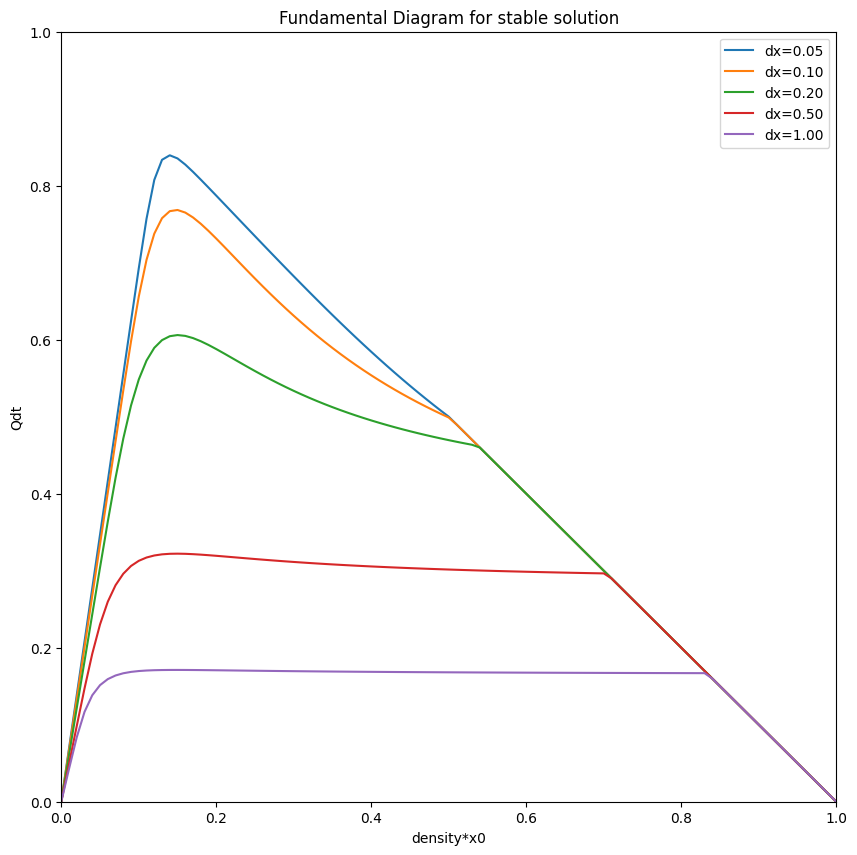

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim((0, 1.0))
ax.set_ylim((0, 1.0))
ax.set_xlabel("density*x0")
ax.set_ylabel("Qdt")
ax.set_title("Fundamental Diagram for stable solution")
for dx_ in [0.05, 0.1, 0.2, 0.5, 1.0]:
	density, flow = fundamental_stable(x_0=x_0, v_0=v_0, dt=dt, dx=dx_)
	ax.plot(density, flow, label="dx={:.2f}".format(dx_))
ax.legend()
plt.show()

## `v0`をかえる

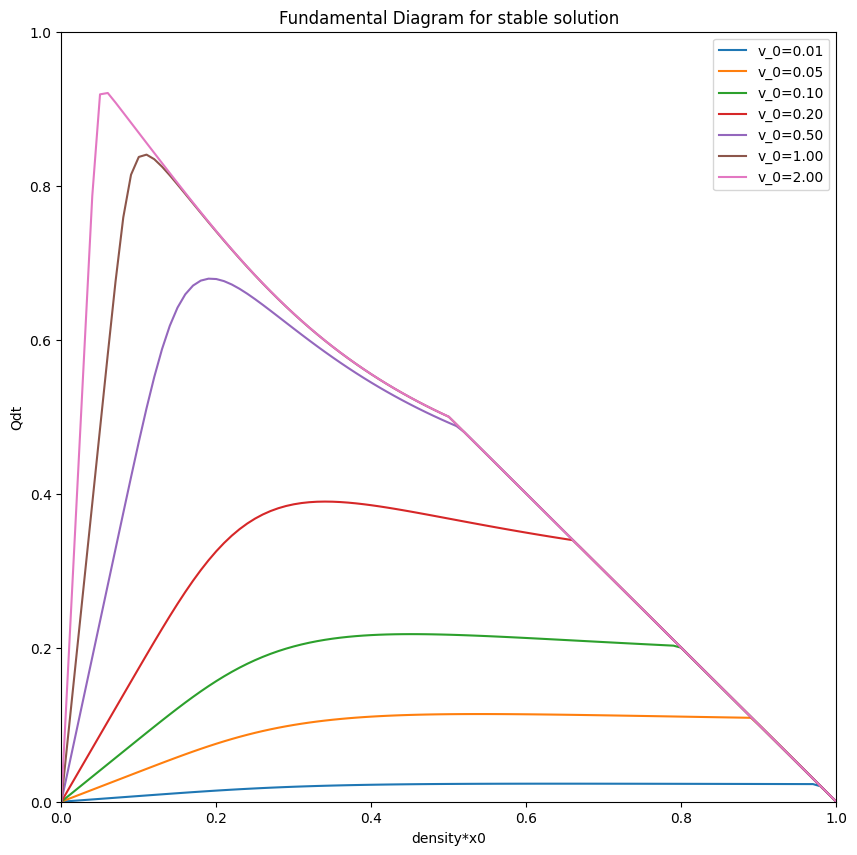

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim((0, 1.0))
ax.set_ylim((0, 1.0))
ax.set_xlabel("density*x0")
ax.set_ylabel("Qdt")
ax.set_title("Fundamental Diagram for stable solution")
for v_0_ in [0.01, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0]:
	density, flow = fundamental_stable(x_0=x_0, v_0=v_0_, dt=dt, dx=dx)
	ax.plot(density, flow, label="v_0={:.2f}".format(v_0_))
ax.legend()
plt.show()